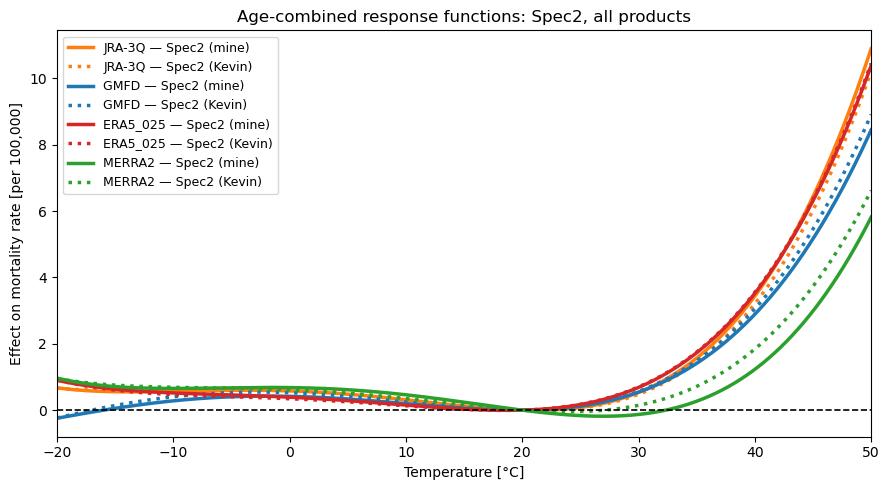

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def quartic(T, coefs):
    return (coefs["c"]
            + coefs["b1"]*T
            + coefs["b2"]*(T**2)
            + coefs["b3"]*(T**3)
            + coefs["b4"]*(T**4))

def effect_curve(T, coefs, T_ref=20.0):
    return quartic(T, coefs) - quartic(T_ref, coefs)

T = np.linspace(-20, 50, 1000)
T_ref = 20.0

#JRA-3Q
jra_spec2_mine = dict(b1=-0.0114065626759076, b2=-0.0016837872900517,
                      b3=-0.000013549134254, b4=0.00000268545277992,
                      c=775.2884988526364)
jra_spec2_kevin = dict(b1=-0.0140316105983195, b2=-0.0017224652742285,
                       b3=-0.00000633843289634, b4=0.00000246169898280,
                       c=795.9875837642322)

#GMFD
gmfd_spec2_mine = dict(b1=-0.007532, b2=-.0019188,
                       b3=0.0000341, b4=0.00000143,
                       c=722.4586)
gmfd_spec2_kevin = dict(b1=-0.0124448044189296, b2=-0.0021711793626568,
                        b3=0.0000459423617187, b4=0.00000139018311033,
                        c=749.6317877640562)

#ERA5_025
era_spec2_mine = dict(b1=-0.016843600360064, b2=-0.0007836808895055,
                      b3=-0.0000141518249143, b4=0.00000232948607584,
                      c=701.4088479599028)
era_spec2_kevin = dict(b1=-0.0149826366586083, b2=-0.0006794793291251,
                       b3=-0.0000195130987389, b4=0.00000239933978084,
                       c=679.3795215789943)

#MERRA2
merra_spec2_mine = dict(b1=-0.00474451752548878, b2= -.0014597251426451,
                        b3=-.0000484663115945, b4=2.41243138757e-06,
                        c=868.6375107577733)
merra_spec2_kevin = dict(b1=-0.0147543603975829, b2=-0.0011368004915714,
                         b3=-0.0000225184028852, b4=0.00000198403192432,
                         c=817.0593549007421)

#normalize all curves
y_jra_m  = effect_curve(T, jra_spec2_mine, T_ref)
y_jra_k  = effect_curve(T, jra_spec2_kevin, T_ref)

y_gmfd_m = effect_curve(T, gmfd_spec2_mine, T_ref)
y_gmfd_k = effect_curve(T, gmfd_spec2_kevin, T_ref)

y_era_m  = effect_curve(T, era_spec2_mine, T_ref)
y_era_k  = effect_curve(T, era_spec2_kevin, T_ref)

y_merra_m = effect_curve(T, merra_spec2_mine, T_ref)
y_merra_k = effect_curve(T, merra_spec2_kevin, T_ref)

#Plot
fig, ax = plt.subplots(figsize=(9,5))

# JRA-3Q
ax.plot(T, y_jra_m, lw=2.5, color='tab:orange', label="JRA-3Q — Spec2 (mine)")
ax.plot(T, y_jra_k, lw=2.5, color='tab:orange', ls=':', label="JRA-3Q — Spec2 (Kevin)")

# GMFD
ax.plot(T, y_gmfd_m, lw=2.5, color='tab:blue', label="GMFD — Spec2 (mine)")
ax.plot(T, y_gmfd_k, lw=2.5, color='tab:blue', ls=':', label="GMFD — Spec2 (Kevin)")

# ERA5_025
ax.plot(T, y_era_m, lw=2.5, color='tab:red', label="ERA5_025 — Spec2 (mine)")
ax.plot(T, y_era_k, lw=2.5, color='tab:red', ls=':', label="ERA5_025 — Spec2 (Kevin)")

# MERRA2
ax.plot(T, y_merra_m, lw=2.5, color='tab:green', label="MERRA2 — Spec2 (mine)")
ax.plot(T, y_merra_k, lw=2.5, color='tab:green', ls=':', label="MERRA2 — Spec2 (Kevin)")

# zero line
ax.axhline(0, ls='--', lw=1.2, color='k')

# labels
ax.set_title("Age-combined response functions: Spec2, all products")
ax.set_xlabel("Temperature [°C]")
ax.set_ylabel("Effect on mortality rate [per 100,000]")

ax.legend(frameon=True, fontsize=9)
ax.margins(x=0)
ax.grid(False)
plt.tight_layout()
plt.show()

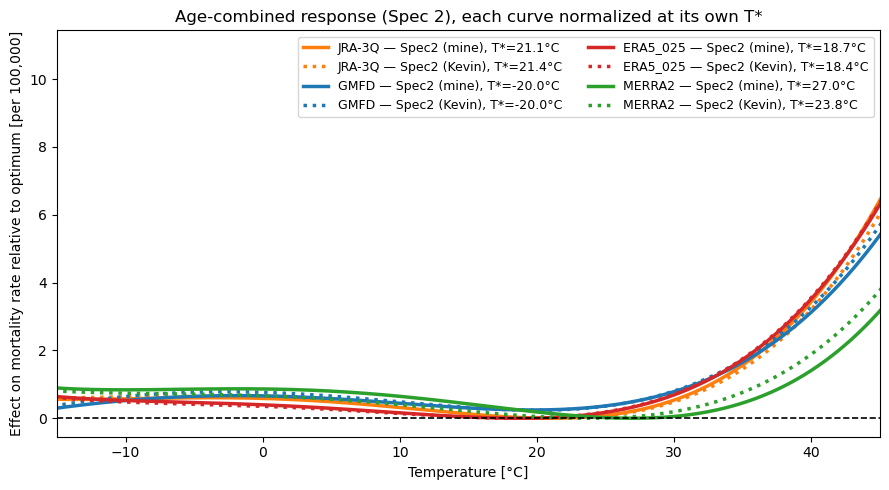

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def quartic(T, coefs):
    return (coefs["c"]
            + coefs["b1"]*T
            + coefs["b2"]*T**2
            + coefs["b3"]*T**3
            + coefs["b4"]*T**4)

def find_Tstar(coefs, Tmin=-20.0, Tmax=50.0):
    """
    Solve f'(T)=0 analytically and pick the minimizing root within [Tmin, Tmax].
    If no real root is inside the band, fall back to the closer boundary.
    """
    b1, b2, b3, b4 = coefs["b1"], coefs["b2"], coefs["b3"], coefs["b4"]
    # derivative: 4 b4 T^3 + 3 b3 T^2 + 2 b2 T + b1 = 0
    p = [4*b4, 3*b3, 2*b2, b1]
    roots = np.roots(p)
    roots = roots[np.isreal(roots)].real

    # Candidates: real stationary points inside the window + boundaries
    cand = [t for t in roots if Tmin <= t <= Tmax] + [Tmin, Tmax]
    vals = [quartic(t, coefs) for t in cand]
    return float(cand[int(np.argmin(vals))])

def normalize_at_Tstar(T_grid, coefs, Tmin=-20.0, Tmax=50.0):
    """Return curve centered at its analytic minimum and the argmin temperature T*."""
    Tstar = find_Tstar(coefs, Tmin, Tmax)
    y = quartic(T_grid, coefs)
    return y - quartic(Tstar, coefs), Tstar

# ----------------- Data (yours) -----------------
T = np.linspace(-20, 50, 1000)

# JRA-3Q
jra_spec2_mine = dict(b1=-0.0114065626759076, b2=-0.0016837872900517,
                      b3=-0.000013549134254, b4=0.00000268545277992,
                      c=775.2884988526364)
jra_spec2_kevin = dict(b1=-0.0140316105983195, b2=-0.0017224652742285,
                       b3=-0.00000633843289634, b4=0.00000246169898280,
                       c=795.9875837642322)

# GMFD
gmfd_spec2_mine = dict(b1=-0.007532, b2=-.0019188,
                       b3=0.0000341, b4=0.00000143,
                       c=722.4586)
gmfd_spec2_kevin = dict(b1=-0.0124448044189296, b2=-0.0021711793626568,
                        b3=0.0000459423617187, b4=0.00000139018311033,
                        c=749.6317877640562)

# ERA5_025
era_spec2_mine = dict(b1=-0.016843600360064, b2=-0.0007836808895055,
                      b3=-0.0000141518249143, b4=0.00000232948607584,
                      c=701.4088479599028)
era_spec2_kevin = dict(b1=-0.0149826366586083, b2=-0.0006794793291251,
                       b3=-0.0000195130987389, b4=0.00000239933978084,
                       c=679.3795215789943)

# MERRA2
merra_spec2_mine = dict(b1=-0.00474451752548878, b2= -.0014597251426451,
                        b3=-.0000484663115945, b4=2.41243138757e-06,
                        c=868.6375107577733)
merra_spec2_kevin= dict(b1=-0.0147543603975829, b2=-0.0011368004915714,
                        b3=-0.0000225184028852, b4=0.00000198403192432,
                        c=817.0593549007421)

series = [
    ("JRA-3Q",   "tab:orange", jra_spec2_mine,  jra_spec2_kevin),
    ("GMFD",     "tab:blue",   gmfd_spec2_mine, gmfd_spec2_kevin),
    ("ERA5_025", "tab:red",    era_spec2_mine,  era_spec2_kevin),
    ("MERRA2",   "tab:green",  merra_spec2_mine,merra_spec2_kevin),
]

# ----------------- Plot -----------------
fig, ax = plt.subplots(figsize=(9,5))

Tmin, Tmax = -20.0, 50.0  # Kevin-style plausible band for T*

for name, color, mine, kev in series:
    y_mine, Tstar_m = normalize_at_Tstar(T, mine, Tmin, Tmax)
    y_kev,  Tstar_k = normalize_at_Tstar(T, kev,  Tmin, Tmax)

    ax.plot(T, y_mine, lw=2.5, color=color,
            label=f"{name} — Spec2 (mine), T*={Tstar_m:.1f}°C")
    ax.plot(T, y_kev,  lw=2.5, color=color, ls=':',
            label=f"{name} — Spec2 (Kevin), T*={Tstar_k:.1f}°C")

# zero line (all curves now touch 0 at their own minima)
ax.axhline(0, ls='--', lw=1.2, color='k')

ax.set_xlim(-15, 45)
ax.set_ylim(None, None)   # or set e.g. (-1, 8) if you want fixed bounds
ax.set_title("Age-combined response (Spec 2), each curve normalized at its own T*")
ax.set_xlabel("Temperature [°C]")
ax.set_ylabel("Effect on mortality rate relative to optimum [per 100,000]")

ax.legend(frameon=True, fontsize=9, ncol=2)
ax.margins(x=0)
ax.grid(False)
plt.tight_layout()
plt.show()
